In [10]:
#IMPORT MODULES

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import math
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [11]:
# READ PROCESSED DATA
df = pd.read_csv('Final Data');

In [13]:
#PICK THE REQUIRED FEATURES FROM THE DATASET

#X = np.array(df[['2 min wind speed squared','Avg Wind Speed Squared','5 second wind speed squared','Fog/Ice','Heavy/Freezing Fog','Thunder']]);
X = np.array(df[['5 second wind speed squared', '2 min wind speed squared', 'Thunder','Fog/Ice']]);
y = np.array(df['Power Outage']);


#Split the data into X and Y, and then into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 20);

In [14]:
#DECLARE NUMBER OF BINS AND DATA DIMENSIONALITY

numberBins = 25  #number of bins for each feature
dim = 4

In [15]:
#CODE RESPONSIBLE FOR GENERATING BUCKETS FOR THE TRAINING DATA TO FALL INTO

binNumbers_train = np.zeros(dim)              #The set of feature bins that each data point falls into
from collections import defaultdict
 
Buckets_train = defaultdict(list)             #Final number of buckets
Values_train =  defaultdict(list)

for i in range (0, len(X_train)):
    for j in range(0,dim):
        c = np.ceil(X_train[i][j] * numberBins)
        binNumbers_train[j] = c
        s = 0
    for k in range(0, len(binNumbers_train)):
                    
        if binNumbers_train[k] != 0:
            s = s + ((binNumbers_train[k]-1)*((numberBins)**(dim-k-1)))    #finding bucket number

    bucketNumber = s
    Buckets_train[int(s)].append(X_train[i])
    Values_train[int(s)].append(y_train[i])


In [16]:
#CODE RESPONSIBLE FOR FINDING THE BUCKET THAT EACH TESTING DATA POINT FALLS INTO

predict = np.zeros(len(X_test))   
binNumbers_test = np.zeros(dim) 
actualPredictedPoints = [np.array([])]*len(X_test)
for i in range(0, len(X_test)):
    for j in range(0,dim):
        c = np.ceil(X_test[i][j] * numberBins)
        binNumbers_test[j] = c
        s = 0
    for k in range(0, len(binNumbers_test)):
        if binNumbers_test[k] != 0:
            s = s + ((binNumbers_test[k]-1)*((numberBins)**(dim-k-1)))    #finding bucket number
            

    bucketNumber = s
    
    sumV = sum(Values_train[s])
    if sumV == 0:
        predict[i] = 0.0
    elif sumV > len(Values_train[s])/2:
        predict[i] = 1.0
    else:
        predict[i] = 0.0


In [17]:
#PRINTING ACCURACY SCORE

accuracy = accuracy_score(y_test, predict);
print(accuracy)


0.92380952381


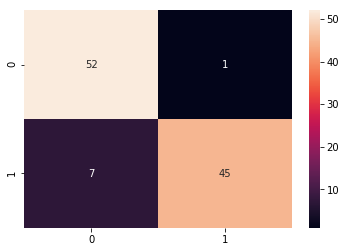

In [18]:
#GENERATING HEATMAP

cm = pd.DataFrame(confusion_matrix(y_test, predict));

sns.heatmap(cm, annot=True);
plt.show()